# Task-5-Exploratory Data Analysis (Sports)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
df=pd.read_csv("ipl/matches.csv")
df1=pd.read_csv("ipl/deliveries.csv")

In [3]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [9]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [10]:
df=df.drop(columns=['umpire3'],axis=1)

In [11]:
df.isnull().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            2
umpire2            2
dtype: int64

In [12]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [13]:
df1=df1.drop(columns=['player_dismissed','dismissal_kind','fielder'],axis=1)

In [14]:
df1.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [15]:
s=df['season'].unique()
s

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

### Teams with most wins

In [16]:
team_win=df.groupby('season')['winner'].value_counts()
season_win=pd.DataFrame(columns=['year','team','wins'])
year=2008
for i in team_win.iteritems():
    if i[0][0]==year:
        wins= pd.DataFrame({
            'year': [i[0][0]],
            'team': [i[0][1]],
            'wins': [i[1]]
        })
        season_win = season_win.append(wins)
        year= year+1  

In [17]:
season_win

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


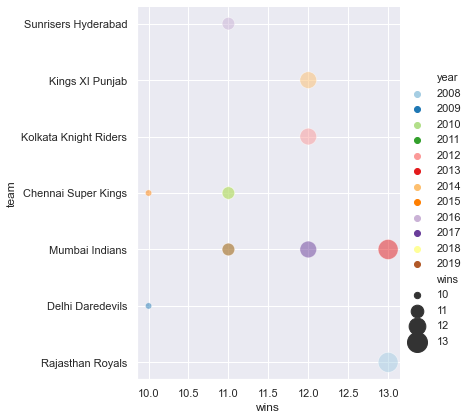

In [18]:
sns.relplot(x="wins", y="team", hue='year', size="wins", sizes=(40, 400), alpha=.5, palette="Paired",height=6, data=season_win)

### Most successful IPL Teams

In [19]:
most_win=df['winner'].value_counts()
most_win1 = pd.DataFrame(columns=["team", "wins"])
for items in most_win.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    most_win1 = most_win1.append(temp_df1, ignore_index=True)

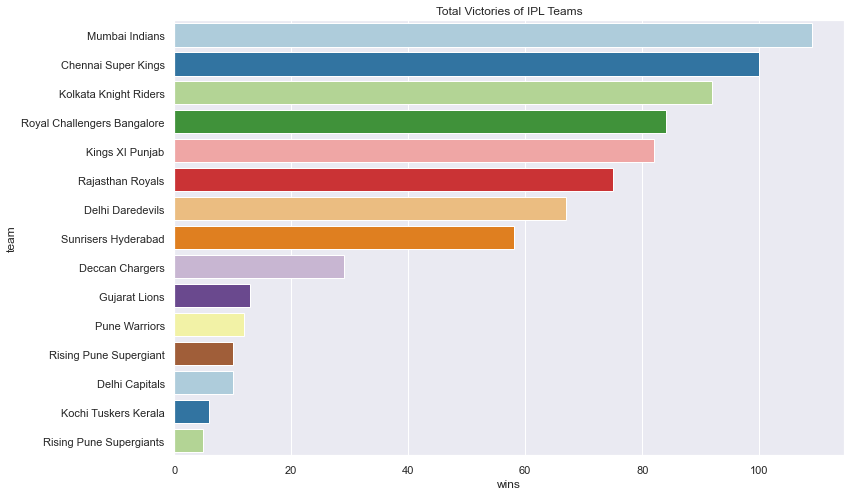

In [20]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=most_win1, palette='Paired');

### Best Player

In [21]:
best_p=df['player_of_match'].value_counts()
best_p1=pd.DataFrame(columns=["player","wins"])
count=0
for i in best_p.iteritems():
    if count>11:
        break;
    else:
        temp_df1=pd.DataFrame({
            "player":[i[0]],
            "wins":[i[1]]
    })
    best_p1=best_p1.append(temp_df1)
    count=count+1

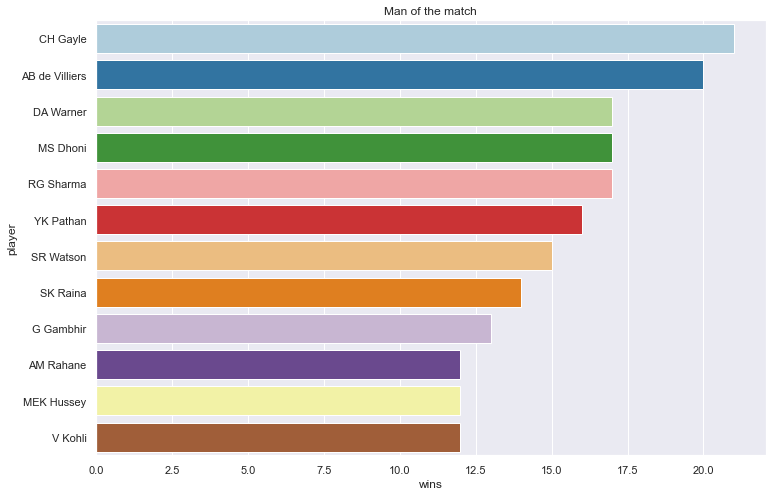

In [22]:
plt.title("Man of the match")
sns.barplot(x='wins', y='player', data=best_p1, palette='Paired');

### Factors contributing to win and loss of a Team
1. Venue
2. Performance of the team 

#### 1. Venue

In [23]:
venue=df['city'].value_counts()
venue1=pd.DataFrame(columns=['city','no. of matches'])
for items in venue.iteritems():
    temp_df1=pd.DataFrame({
            "city":[items[0]],
            "no. of matches":[items[1]]
    })
    venue1=venue1.append(temp_df1)
venue1

,city,no. of matches
0,Mumbai,101
0,Kolkata,77
0,Delhi,74
0,Bangalore,66
0,Hyderabad,64
0,Chennai,57
0,Jaipur,47
0,Chandigarh,46
0,Pune,38
0,Durban,15


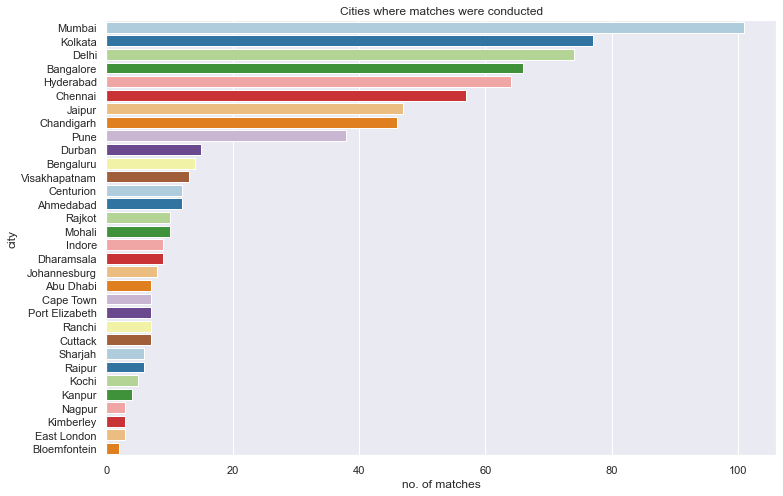

In [24]:
plt.title("Cities where matches were conducted")
sns.barplot(x='no. of matches', y='city', data=venue1, palette='Paired');

#### 2. Performance of the Team
1. Teams that wins by wickets
2. Teams that win by runs
3. Player with most wide runs
4. Probablity of winning the match if won the Toss

In [25]:
wick=df['win_by_wickets'].value_counts()
wick1=pd.DataFrame(columns=['wickets','matches'])
for i in wick.iteritems():
    temp_df1=pd.DataFrame({
        "wickets":[i[0]],
        "matches":[i[1]]
    })
    wick1=wick1.append(temp_df1,ignore_index=True)
wick1

,wickets,matches
0,0,350
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6


In [26]:
for i,j in df.iterrows():
    if (j['id']<15):
        print(i,j)

0 id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2               

In [27]:
for i, j in df.iterrows():
    if(j['win_by_wickets']==10):
        print(j)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [28]:
run=df['win_by_runs'].value_counts()
run.sort_values(ascending=True)

146      1
98       1
77       1
93       1
102      1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

In [29]:
for i,j in df.iterrows():
    if(j['win_by_runs']>100):
        print(j)

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object
id                                          60
season                                    2008
city                                 Bangalore
date                                2008-04-18
team1                    Kolkata Knight Riders
team2              Royal Challengers Bangalore
toss_winner        Royal Challengers Bangalore
toss_decision                      

### Player with most wide runs

In [30]:
bat=df1['wide_runs'].value_counts()
for i,j in bat.iteritems():
    print("Number of wide balls: "+str(i)+" and the count is: "+str(j))

Number of wide balls: 0 and the count is: 173673
Number of wide balls: 1 and the count is: 4915
Number of wide balls: 2 and the count is: 230
Number of wide balls: 5 and the count is: 208
Number of wide balls: 3 and the count is: 47
Number of wide balls: 4 and the count is: 5


In [31]:
wr=df1['wide_runs'].value_counts()
wr1=pd.DataFrame(columns=['wide balls','no. of wide balls'])
for items in wr.iteritems():
    temp_df1=pd.DataFrame({
            "wide balls":[items[0]],
            "no. of wide balls":[items[1]]
    })
    wr1=wr1.append(temp_df1, ignore_index=True)
wr1=wr1.drop(wr1.index[0])

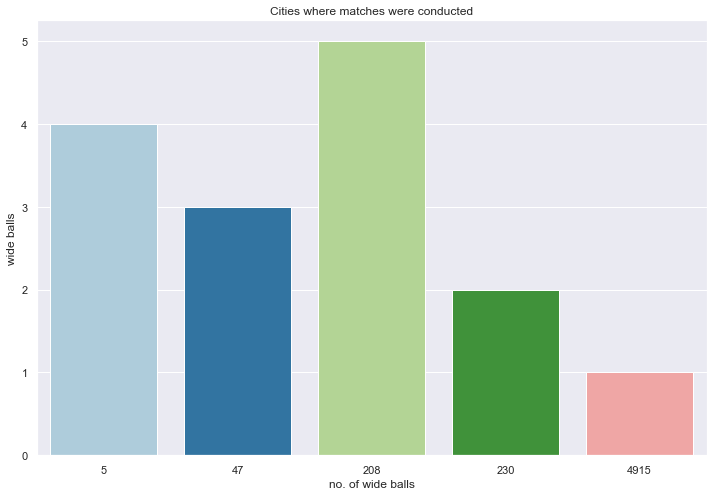

In [32]:
plt.title("Cities where matches were conducted")
sns.barplot(x='no. of wide balls', y='wide balls', data=wr1, palette='Paired');

In [ ]:
print("The bowler with highest number of wide balls are: ")
count=10
for i,j in df1.iterrows():
    if(j['wide_runs']==5 and i<15000):
        print(i,str(j['bowler']))

The bowler with highest number of wide balls are: 
686 SB Jakati
2383 SP Narine
3121 MC Henriques
3650 SL Malinga
4248 Mohammed Shami
5513 K Rabada
6275 TS Mills
6886 SN Thakur
7161 SP Narine
13881 AA Noffke
14538 D Salunkhe
14957 SB Bangar
14991 A Symonds


### Probablity of winning the match if won the Toss

In [ ]:
winner=df['toss_winner']==df['winner']
win=0
for i,j in df.iterrows():
    if(j['toss_winner']==j['winner']):
        win=win+1
prob=win/len(df)
plt.title("The Probablity of winning is: " +str(prob))
sns.countplot(winner)